# Shallow fully connected networks on MNIST using Keras

This notebook will guide you through the use of the `keras` package to train a shallow network for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998

We will use Tensorflow 2 (TF 2) and the Keras API. If you need to install some packages, use `pip install ...`, e.g. `pip install sklearn` for SciKit Learn.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

In [2]:
# First, import TF and get its version.
import tensorflow as tf
from tensorflow import keras
tf_version = tf.__version__
print('Tensorflow version = {}'.format(tf_version))

# Check if version >=2.0.0 is used
if not tf_version.startswith('2.'):
    print('WARNING: TensorFlow >= 2.0.0 will be used in this course.\nYour version is {}'.format(tf_version) + '.\033[0m')
else:
    print('OK: TensorFlow >= 2.0.0' + '.\033[0m')

Tensorflow version = 2.15.0
OK: TensorFlow >= 2.0.0.


## Loading the raw data
First load the `mnist` dataset and normalize it to be in the range [0, 1]

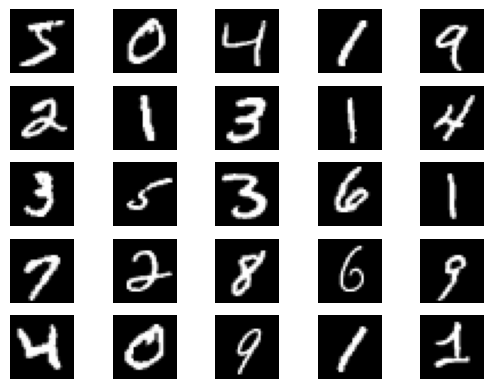

In [3]:
def show_imgs(X):
    plt.figure(1)
    k = 0
    for i in range(0,5):
        for j in range(0,5):
            plt.subplot2grid((5,5),(i,j))
            plt.imshow(X[k], cmap='gray')
            k = k+1
            plt.axis('off')
    # show the plot
    plt.show()
    
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

show_imgs(X_train)

In [4]:
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that.
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


The target values of the network are supposed to be 1-hot targets. Now the `y_train` is an array with scalar values as in `[5 0 4 1 ...]` and it should be a 1-hot array `Y_train` as in : 

`[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]...]`
 
Note the change of capital letter in the `Y_train` to denote, per convention, an array with multiple dimensions.

In [5]:
n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


# One-layer network and weight visualisation
## Define the network

In [6]:
E = 10               # number of epochs
B = 128              # batch size
D = X_train.shape[1] # dimension of input sample - 784 for MNIST

model = keras.models.Sequential()

# one layer network
model.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))
# or considering a specific layer for the softmax: model.add(keras.layers.Activation('softmax'))

# two layers network
#H = 64
#model.add(Dense(H, input_shape=(D,), activation='relu'))
#model.add(Dense(n_classes, input_shape=(D,), activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compile and train the network
In Keras, we call the methods `compile()` and `fit()`. For the compile phase, we need to specify the **loss** function which should be set in the case of multi-class classification to `categorical_crossentropy`. We also need to specify the optimizer strategy. In this case the `rmsprop` or `adam` can be used.

In [7]:
model.compile(loss='categorical_crossentropy', 
              optimizer='rmsprop', 
              metrics=['accuracy'])
log = model.fit(X_train, 
                Y_train, 
                batch_size=B, 
                epochs=E,
                verbose=1, 
                validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 0s 584us/step - loss: 0.6121 - accuracy: 0.8453 - val_loss: 0.3415 - val_accuracy: 0.9089
Epoch 2/10
469/469 [==============================] - 0s 453us/step - loss: 0.3303 - accuracy: 0.9082 - val_loss: 0.2976 - val_accuracy: 0.9179
Epoch 3/10
469/469 [==============================] - 0s 450us/step - loss: 0.3017 - accuracy: 0.9162 - val_loss: 0.2846 - val_accuracy: 0.9209
Epoch 4/10
469/469 [==============================] - 0s 449us/step - loss: 0.2884 - accuracy: 0.9192 - val_loss: 0.2796 - val_accuracy: 0.9222
Epoch 5/10
469/469 [==============================] - 0s 444us/step - loss: 0.2804 - accuracy: 0.9217 - val_loss: 0.2755 - val_accuracy: 0.9243
Epoch 6/10
469/469 [==============================] - 0s 449us/step - loss: 0.2746 - accuracy: 0.9235 - val_loss: 0.2730 - val_accuracy: 0.9250
Epoch 7/10
469/469 [==============================] - 0s 486us/step - loss: 0.2706 - accuracy: 0.9247 - val_loss: 0.2704 - val_accuracy:

## Evaluate the network

We can do this at three levels: (1) plot of the loss during the training phase, (2) overall accuracy evaluation on test set and (3) per class evaluation with confusion matrix on test set.

### Loss evolution during training
This can be done first looking at the history of the training (output of the `fit()` function).

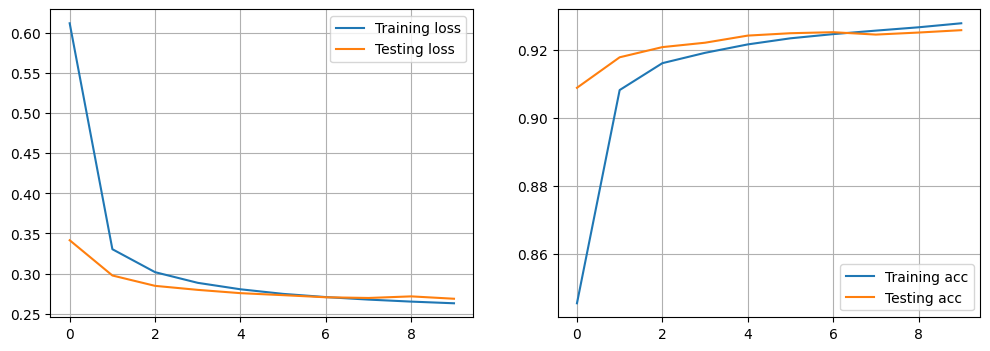

In [8]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()

### Model evaluation
We can compute the overall performance on test set calling the `evaluate()` function on the model. The function returns the loss and the metrics used to compile the models.

In [9]:
loss_test, metric_test = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', loss_test)
print('Test accuracy:', metric_test)

Test loss: 0.268561452627182
Test accuracy: 0.9258999824523926


### Confusion matrix
We can call the `predict()` function to get the predicted classes. The output of this function is an array with the predicted class probabilities, from which we need to take the argmax for each row to get the class label as in `[5 0 4 1 ...]`. The output array of ground truth `y_test` and the predicted classes can then be fed to the `confusion_matrix()` function of [sklearn metrics package](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix).

In [10]:
pred = model.predict(X_test, verbose=1)
y_pred = np.argmax(pred, axis=-1)
print(y_pred[:10])
print(y_test[:10])

313/313 [==============================] - 0s 251us/step
[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


In [11]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 960    0    1    2    0    5    7    2    3    0]
 [   0 1111    3    2    0    1    4    2   12    0]
 [   5    8  915   17    7    6   13   11   46    4]
 [   2    0   16  925    0   23    2   12   23    7]
 [   2    1    2    1  910    0   11    5   11   39]
 [   9    3    1   32    9  777   15    7   33    6]
 [  10    3    5    1    7   13  914    2    3    0]
 [   1    6   21    5    6    0    0  957    4   28]
 [   5    7    6   20    9   25    9   13  874    6]
 [  10    7    1   11   24    7    0   27    6  916]]


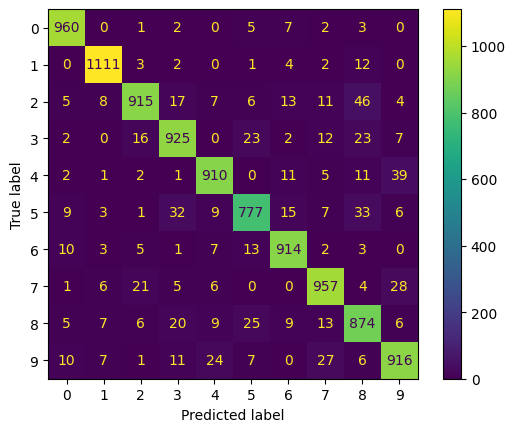

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Plot the weights
The weights connected to a given neuron, when using a one-layer network, have the same shape as the input. They can therefore be plot. To do so we need to re-scale the weight values into 0-255 pixel values.

(784, 10)
(10,)


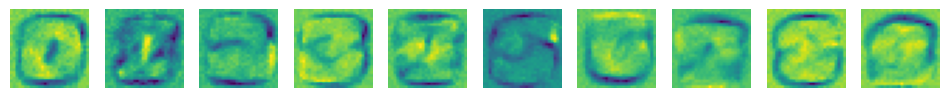

In [13]:
weights = model.get_weights()
for w in weights:
    print(w.shape)
w1 = weights[0]
f = plt.figure(figsize=(12,12))
for i in range(10):
    ax = f.add_subplot(1, 10, 1+i)
    im = w1[:,i]                  # get the weights landing to neuron i
    im = im.reshape(28,28)
    # now put back the pixel values to 0-256 doing a min-max norm and multiplying by 256
    min = np.min(im)
    max = np.max(im)
    im = np.round((im - min)/(max - min) * 255).astype(int)
    ax.axis('off')
    ax.imshow(im)

### Shuffling the pixels

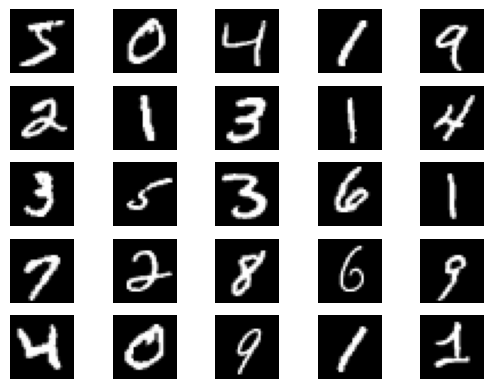

In [14]:
# Load data & split data between train and test sets
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
show_imgs(X_train)

In [15]:
for i in range(X_train.shape[0]):
    np.random.seed(123)
    tmp = X_train[i].reshape(784)  # we need to flatten before shuffing otherwise 
    np.random.shuffle(tmp)         # shuffle takes only 1 dimension
    X_train[i] = tmp.reshape(28,28)
for i in range(X_test.shape[0]):
    np.random.seed(123)
    tmp = X_test[i].reshape(784)
    np.random.shuffle(tmp)
    X_test[i] = tmp.reshape(28,28)

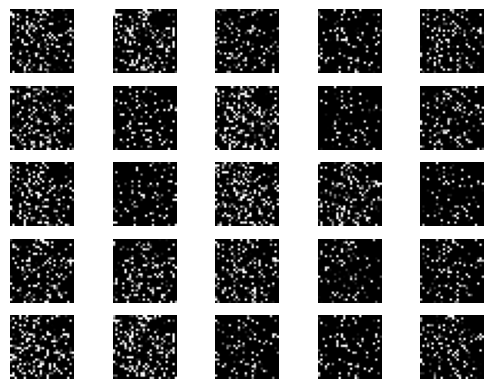

In [16]:
show_imgs(X_train)

In [17]:
# MLP: Input data should be 'flattened'. Alternatively we could use a layer for that
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Normalize input
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [18]:
n_classes = 10
# Conversion to class vectors
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print(Y_train[:10])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [19]:
E = 10                # number of epochs
B = 128              # batch size
D = X_train.shape[1] # dimension of input sample - 784 for MNIST
print(D)
model_shuffled = keras.models.Sequential()

# one layer network
model_shuffled.add(keras.layers.Dense(n_classes, input_shape=(D,), activation='softmax'))
model_shuffled.summary()

784
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model_shuffled.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy'])
log = model_shuffled.fit(X_train,
                Y_train, 
                batch_size=B, 
                epochs=E,
                verbose=1, 
                validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 0s 542us/step - loss: 0.6036 - accuracy: 0.8507 - val_loss: 0.3404 - val_accuracy: 0.9089
Epoch 2/10
469/469 [==============================] - 0s 445us/step - loss: 0.3303 - accuracy: 0.9082 - val_loss: 0.2995 - val_accuracy: 0.9169
Epoch 3/10
469/469 [==============================] - 0s 444us/step - loss: 0.3011 - accuracy: 0.9158 - val_loss: 0.2857 - val_accuracy: 0.9210
Epoch 4/10
469/469 [==============================] - 0s 447us/step - loss: 0.2880 - accuracy: 0.9203 - val_loss: 0.2780 - val_accuracy: 0.9245
Epoch 5/10
469/469 [==============================] - 0s 445us/step - loss: 0.2798 - accuracy: 0.9217 - val_loss: 0.2761 - val_accuracy: 0.9234
Epoch 6/10
469/469 [==============================] - 0s 485us/step - loss: 0.2744 - accuracy: 0.9238 - val_loss: 0.2725 - val_accuracy: 0.9252
Epoch 7/10
469/469 [==============================] - 0s 448us/step - loss: 0.2706 - accuracy: 0.9254 - val_loss: 0.2708 - val_accuracy:

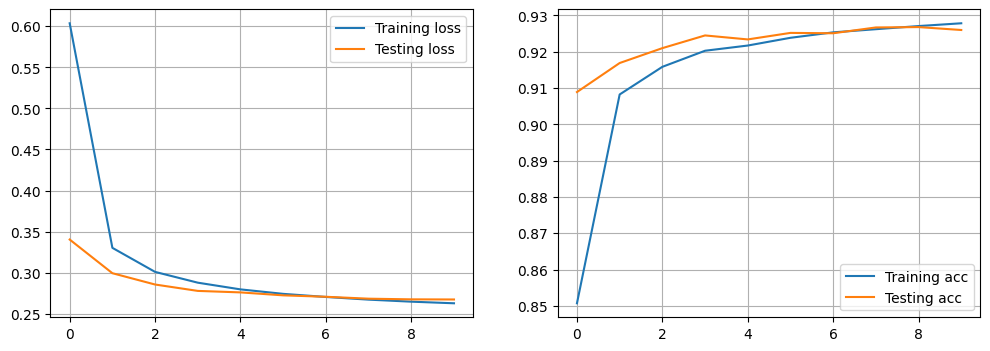

In [21]:
f = plt.figure(figsize=(12,4))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.plot(log.history['loss'], label='Training loss')
ax1.plot(log.history['val_loss'], label='Testing loss')
ax1.legend()
ax1.grid()
ax2.plot(log.history['accuracy'], label='Training acc')
ax2.plot(log.history['val_accuracy'], label='Testing acc')
ax2.legend()
ax2.grid()